In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## МГТУ им. Н. Э. Баумана
## Факультет: Информатика, искусственный интеллект и системы управления
## Кафедра: Системы обработки информации и управления
## Дисциплина: Методы машинного обучения
## Лабораторная работа №3 "Обработка признаков (часть 2)"
## Выполнил: Сальников В.В. ИУ5-23М

Задание:

1. Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
 - масштабирование признаков (не менее чем тремя способами);
 - обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
 - обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
 - отбор признаков:
    - один метод из группы методов фильтрации (filter methods);
    - один метод из группы методов обертывания (wrapper methods);
    - один метод из группы методов вложений (embedded methods).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.datasets import load_wine
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

In [3]:
wine_dataset = load_wine()
data = pd.DataFrame(wine_dataset.data,
                      columns=wine_dataset.feature_names)
data['Y'] = wine_dataset.target
data.shape

(178, 14)

In [4]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<h2>Масштабирование признаков

In [6]:
X_ALL = data.drop('Y', axis=1)
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((142, 13), (36, 13))

<h3>Масштабирование данных на основе Z-оценки

In [7]:
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [8]:
data_cs11_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [9]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

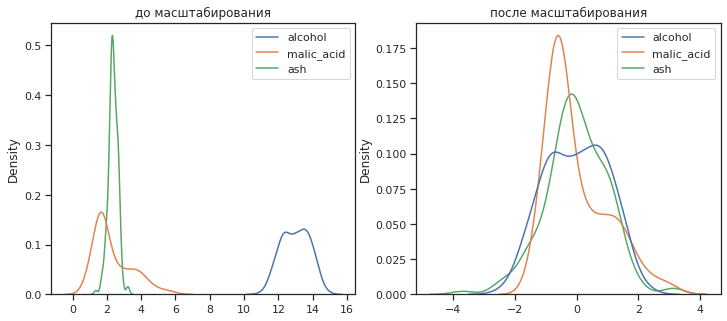

In [10]:
draw_kde(['alcohol', 'malic_acid', 'ash'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [11]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [12]:
data_cs12_scaled_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,5.876364e-15,-4.049968e-16,-1.150879e-15,-1.476128e-15,4.472166e-16,1.254083e-15,4.941274e-16,-1.454236e-15,-1.376051e-16,-7.724650e-16,-3.283758e-16,4.503440e-16,6.567516e-17
std,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00
min,-2.450109e+00,-1.290696e+00,-3.568047e+00,-2.685087e+00,-2.076741e+00,-2.036411e+00,-1.632019e+00,-1.976952e+00,-1.978201e+00,-1.593457e+00,-1.785547e+00,-1.847562e+00,-1.548804e+00
25%,-8.052291e-01,-6.962761e-01,-5.534794e-01,-6.333231e-01,-7.798562e-01,-8.847493e-01,-9.383896e-01,-8.069072e-01,-5.798549e-01,-8.264516e-01,-8.153279e-01,-9.334496e-01,-7.927887e-01
50%,7.183187e-02,-4.537869e-01,-1.516382e-02,-2.455807e-02,-1.314136e-01,-5.872972e-02,8.837999e-02,-2.218848e-01,-1.766509e-01,-1.787579e-01,6.768041e-02,2.538462e-01,-2.207596e-01
75%,8.334080e-01,7.028650e-01,6.218430e-01,5.917225e-01,5.170289e-01,8.348011e-01,7.745505e-01,5.929679e-01,5.654159e-01,4.817192e-01,6.999580e-01,8.142218e-01,7.384764e-01
max,2.294136e+00,2.915311e+00,3.142954e+00,2.696095e+00,4.551783e+00,2.570236e+00,3.081674e+00,2.201780e+00,3.460763e+00,3.400602e+00,3.272674e+00,1.977001e+00,3.141166e+00


In [13]:
data_cs12_scaled_test.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.050330,-0.285690,0.218106,-0.054621,0.326899,0.260294,0.236719,-0.194027,0.237038,0.081290,-0.043755,0.158505,0.097592
std,1.065803,0.725327,0.897767,1.018644,1.100141,0.941037,0.941612,1.175999,0.879652,0.934068,0.982369,0.962004,1.243789
min,-1.975684,-1.428035,-2.168426,-2.264212,-1.068053,-1.401012,-1.492796,-1.893378,-1.309054,-1.261088,-2.090784,-1.819543,-1.435067
25%,-0.733441,-0.655504,-0.266378,-0.821214,-0.527684,-0.662359,-0.637569,-1.224780,-0.275307,-0.738033,-0.662709,-0.460633,-0.853002
50%,0.071832,-0.531040,0.218106,0.065629,0.156783,0.401935,0.312131,-0.347247,0.295183,0.034299,0.002272,0.442973,-0.379657
75%,0.895832,0.134196,0.819225,0.591723,1.003361,0.965852,1.013218,0.551181,0.702677,0.513678,0.645451,1.006851,0.858067
max,1.732317,1.893852,2.030436,3.147032,3.759242,1.648907,1.649666,2.452504,2.396991,2.867959,1.528460,1.402616,2.696254


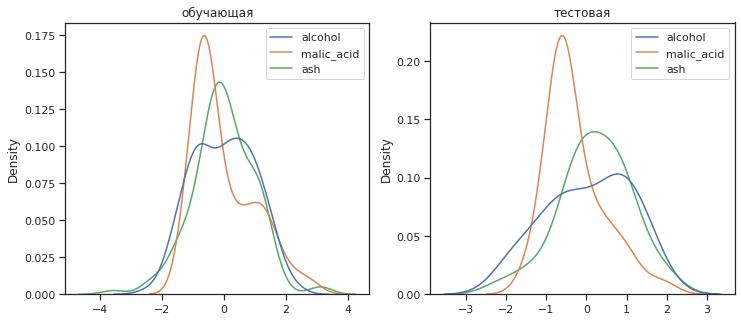

In [14]:
draw_kde(['alcohol', 'malic_acid', 'ash'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

<h3>Масштабирование "Mean Normalisation"

In [15]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [16]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.002146,-0.013737,0.006573,-0.002053,0.009974,0.011428,0.010157,-0.009391,0.008814,0.003292,-0.001750,0.008382,0.004208
std,0.213639,0.227989,0.146708,0.186568,0.155244,0.215811,0.210730,0.248907,0.180555,0.197806,0.197044,0.260070,0.224613
min,-0.516438,-0.339523,-0.531671,-0.498977,-0.313304,-0.442059,-0.346229,-0.473099,-0.363709,-0.319071,-0.413344,-0.483078,-0.330237
25%,-0.165780,-0.163502,-0.077126,-0.130262,-0.117652,-0.179128,-0.163740,-0.193099,-0.098725,-0.153542,-0.152568,-0.238572,-0.171536
50%,0.015141,-0.109931,0.003088,-0.001770,-0.008956,0.032079,0.032463,-0.053099,-0.002510,-0.028115,0.004760,0.070036,-0.048140
75%,0.180272,0.138538,0.108703,0.109961,0.088870,0.185527,0.188581,0.141901,0.122095,0.100725,0.138380,0.212893,0.174042
max,0.483562,0.693130,0.468329,0.584822,0.686696,0.557941,0.653771,0.586901,0.636291,0.680929,0.647001,0.516922,0.669763


In [17]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)
data_cs22_scaled_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,1.239228e-15,-1.020311e-16,-1.673153e-16,-2.689554e-16,6.684794e-17,2.720828e-16,1.016401e-16,-3.475311e-16,-2.189172e-17,-1.532421e-16,-6.723886e-17,1.188408e-16,1.446417e-17
std,2.115278e-01,2.385968e-01,1.495365e-01,1.864906e-01,1.513972e-01,2.178460e-01,2.128989e-01,2.401542e-01,1.845094e-01,2.009467e-01,1.983978e-01,2.623933e-01,2.139758e-01
min,-5.164381e-01,-3.068698e-01,-5.316713e-01,-4.989771e-01,-3.133037e-01,-4.420593e-01,-3.462293e-01,-4.730986e-01,-3.637091e-01,-3.190706e-01,-3.529990e-01,-4.830780e-01,-3.302375e-01
25%,-1.697276e-01,-1.655433e-01,-8.247345e-02,-1.176922e-01,-1.176516e-01,-1.920593e-01,-1.990774e-01,-1.930986e-01,-1.066113e-01,-1.654869e-01,-1.611887e-01,-2.440670e-01,-1.690392e-01
50%,1.514085e-02,-1.078902e-01,-2.259547e-03,-4.563695e-03,-1.982547e-02,-1.274891e-02,1.874963e-02,-5.309859e-02,-3.247878e-02,-3.579412e-02,1.338028e-02,6.637259e-02,-4.707058e-02
75%,1.756672e-01,1.671098e-01,9.266024e-02,1.099614e-01,7.800061e-02,1.812166e-01,1.643192e-01,1.419014e-01,1.039565e-01,9.645844e-02,1.383803e-01,2.128927e-01,1.574587e-01
max,4.835619e-01,6.931302e-01,4.683287e-01,5.010229e-01,6.866963e-01,5.579407e-01,6.537707e-01,5.269014e-01,6.362909e-01,6.809294e-01,6.470010e-01,5.169220e-01,6.697625e-01


In [18]:
data_cs22_scaled_test.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.010609,-0.067924,0.032500,-0.010150,0.049317,0.056504,0.050219,-0.046432,0.043582,0.016277,-0.008650,0.041444,0.020809
std,0.224652,0.172450,0.133775,0.189298,0.165971,0.204278,0.199761,0.281425,0.161732,0.187036,0.194212,0.251533,0.265202
min,-0.416438,-0.339523,-0.323115,-0.420765,-0.161130,-0.304128,-0.316693,-0.453099,-0.240681,-0.252518,-0.413344,-0.475752,-0.305986
25%,-0.154596,-0.155849,-0.039693,-0.152608,-0.079608,-0.143783,-0.135259,-0.293099,-0.050618,-0.147782,-0.131016,-0.120441,-0.181878
50%,0.015141,-0.126258,0.032500,0.012196,0.023653,0.087251,0.066218,-0.083099,0.054272,0.006868,0.000449,0.115823,-0.080951
75%,0.188825,0.031906,0.122072,0.109961,0.151370,0.209665,0.214952,0.131901,0.129193,0.102858,0.127604,0.263259,0.182958
max,0.365141,0.450273,0.302553,0.584822,0.567131,0.357941,0.349973,0.586901,0.440707,0.574274,0.302173,0.366739,0.574898


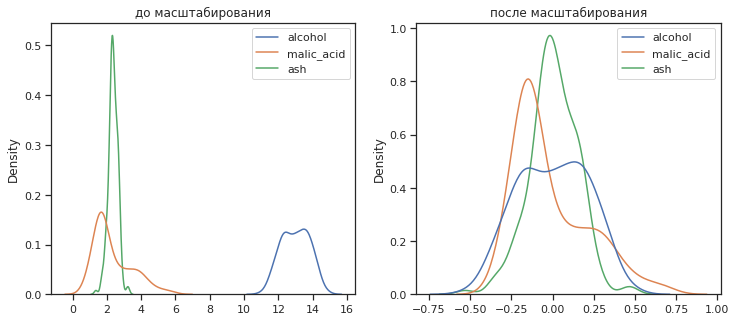

In [19]:
draw_kde(['alcohol', 'malic_acid', 'ash'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

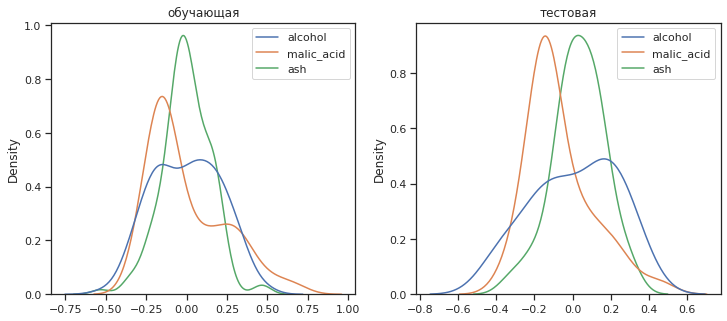

In [20]:
draw_kde(['alcohol', 'malic_acid', 'ash'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

<h3>Масштабирование по медиане

In [21]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,1.780000e+02,178.000000,178.000000,178.000000,178.000000,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,178.000000,178.000000,178.000000
mean,-0.037553,3.184786e-01,0.018754,-0.001176,0.091662,-0.056631,-6.331158e-02,0.130471,5.128411e-02,1.235201e-01,-0.022372,-0.136564,0.151482
std,0.617359,7.548284e-01,0.789479,0.776643,0.751710,0.591821,5.981190e-01,0.743005,8.176555e-01,7.779483e-01,0.677249,0.576057,0.649964
min,-1.536122,-7.601351e-01,-2.877698,-2.069767,-1.473684,-1.300236,-1.074850e+00,-1.253731,-1.635714e+00,-1.144295e+00,-1.437037,-1.225152,-0.816305
25%,-0.522814,-1.773649e-01,-0.431655,-0.534884,-0.526316,-0.579196,-5.568862e-01,-0.417910,-4.357143e-01,-4.932886e-01,-0.540741,-0.683570,-0.357069
50%,0.000000,-7.502679e-17,0.000000,0.000000,0.000000,0.000000,1.327063e-16,0.000000,-1.587272e-16,1.491862e-16,0.000000,0.000000,0.000000
75%,0.477186,8.226351e-01,0.568345,0.465116,0.473684,0.420804,4.431138e-01,0.582090,5.642857e-01,5.067114e-01,0.459259,0.316430,0.642931
max,1.353612,2.658784e+00,2.503597,2.441860,3.368421,1.442080,1.763473e+00,1.910448,2.892857e+00,2.788591e+00,2.207407,0.989858,2.077399


In [22]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

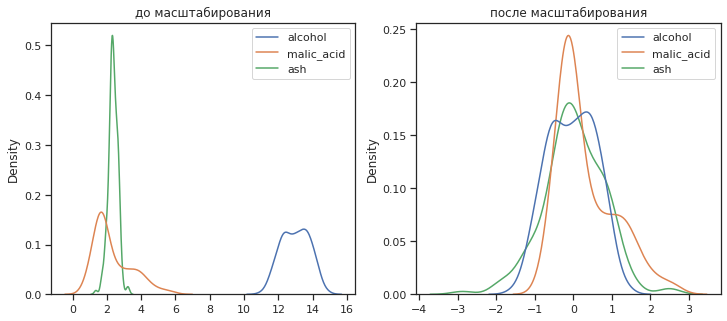

In [23]:
draw_kde(['alcohol', 'malic_acid', 'ash'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

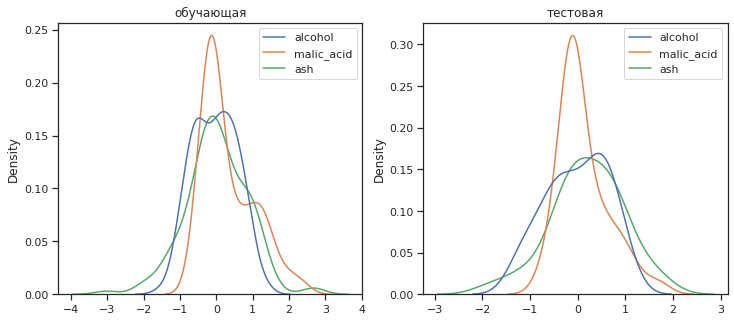

In [24]:
draw_kde(['alcohol', 'malic_acid', 'ash'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

<h2>Обработка выбросов

In [25]:
x_col_list = ['alcohol', 'malic_acid', 'ash']

In [26]:
wine_dataset = load_wine()
data = pd.DataFrame(wine_dataset.data,
                      columns=wine_dataset.feature_names)[x_col_list]
data['Y'] = wine_dataset.target
data.shape

(178, 4)

In [27]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

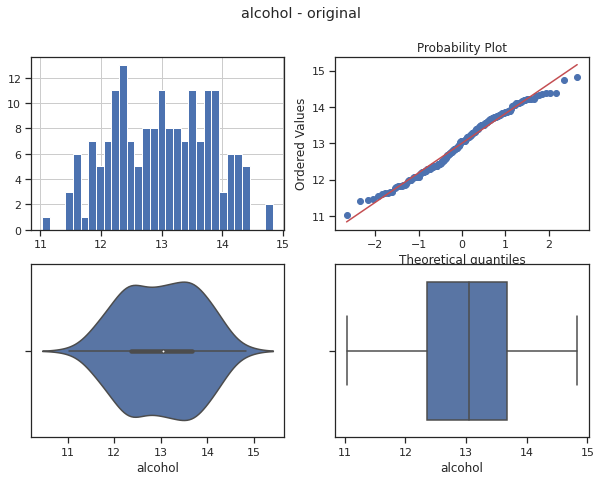

In [28]:
diagnostic_plots(data, 'alcohol', 'alcohol - original')

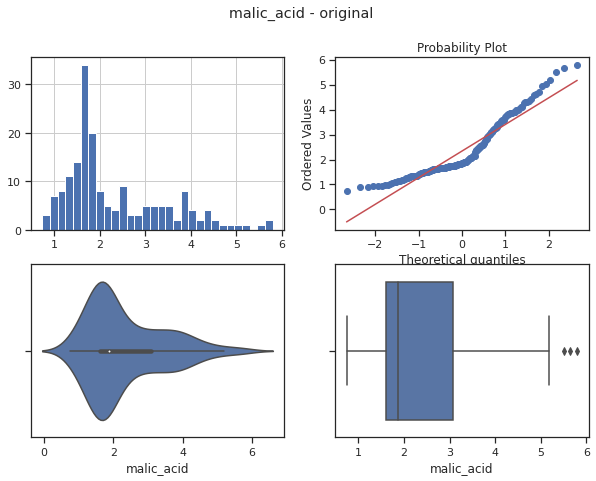

In [29]:
diagnostic_plots(data, 'malic_acid', 'malic_acid - original')

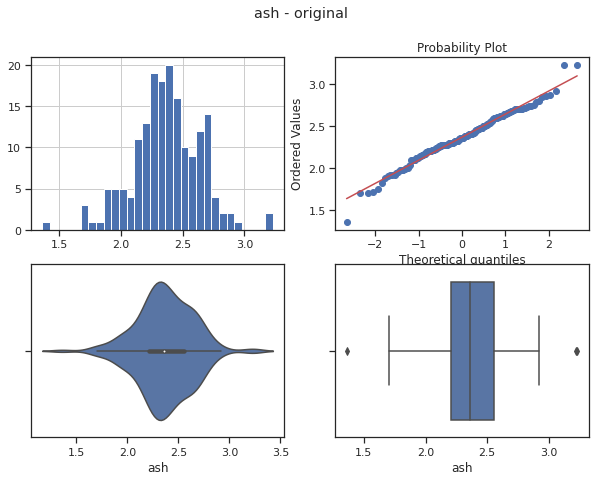

In [30]:
diagnostic_plots(data, 'ash', 'ash - original')

<h3>Удаление выбросов

In [31]:
data.shape

(178, 4)

In [32]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [33]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary 

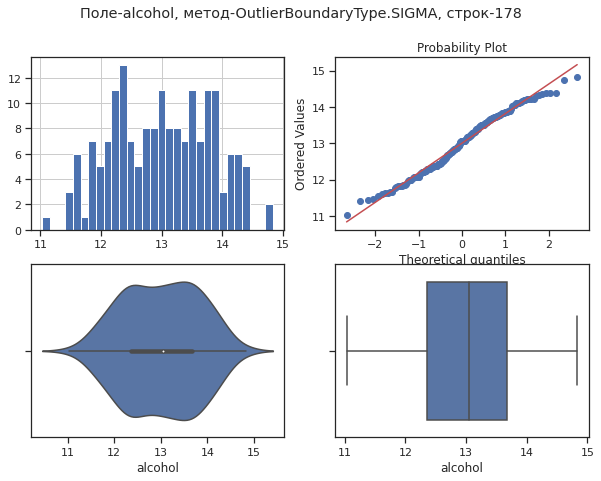

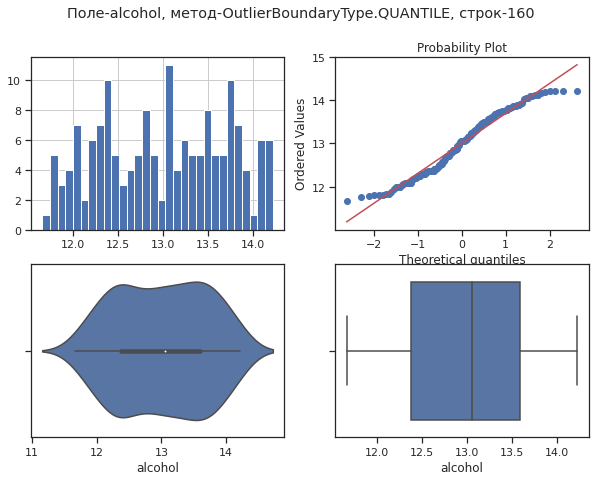

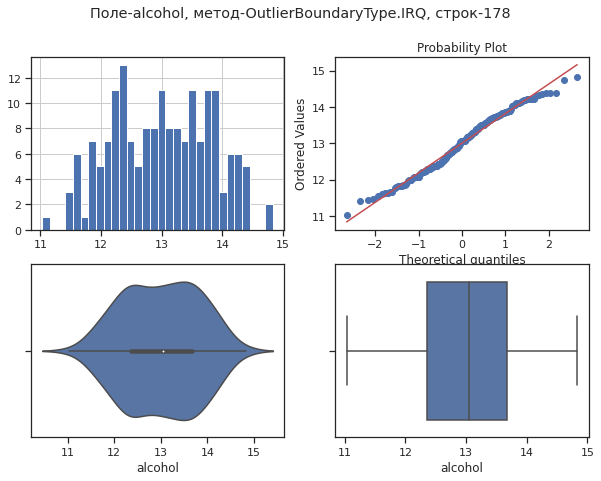

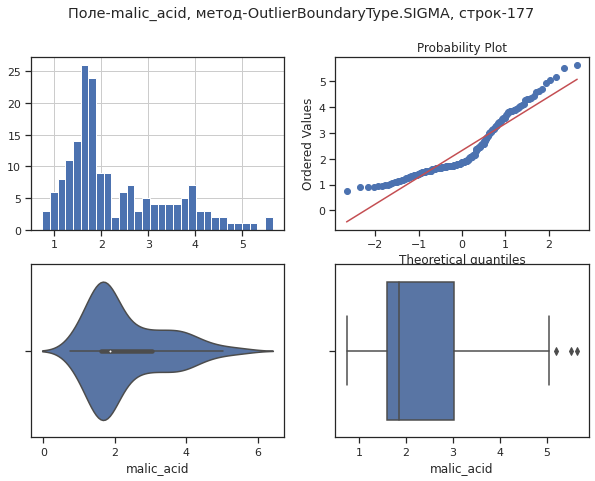

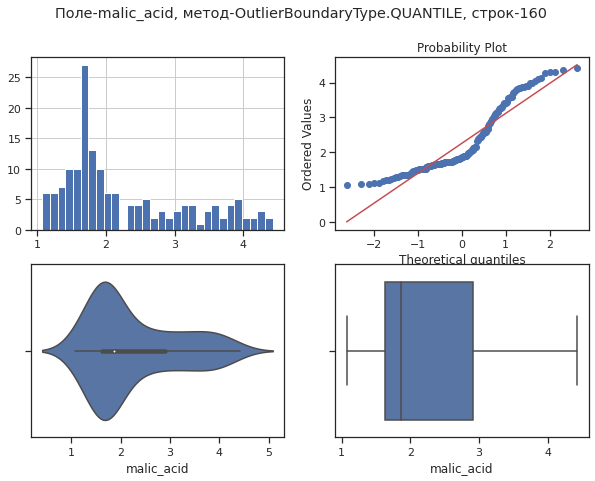

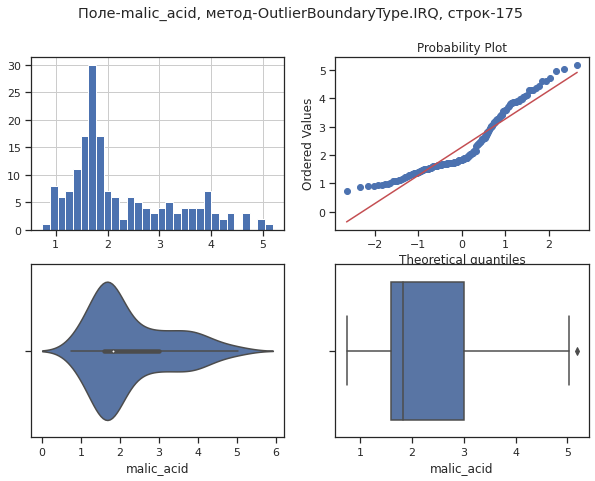

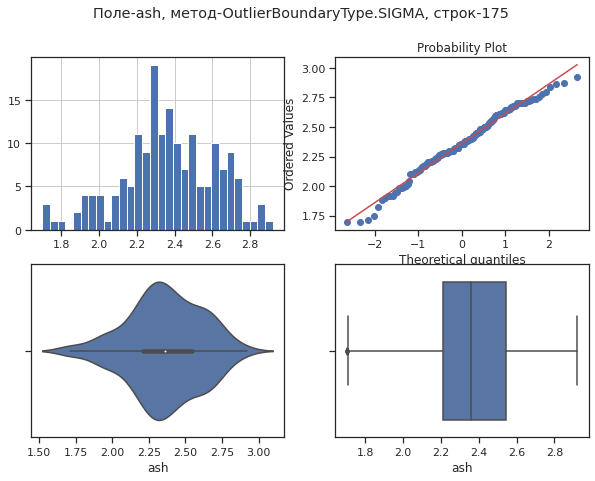

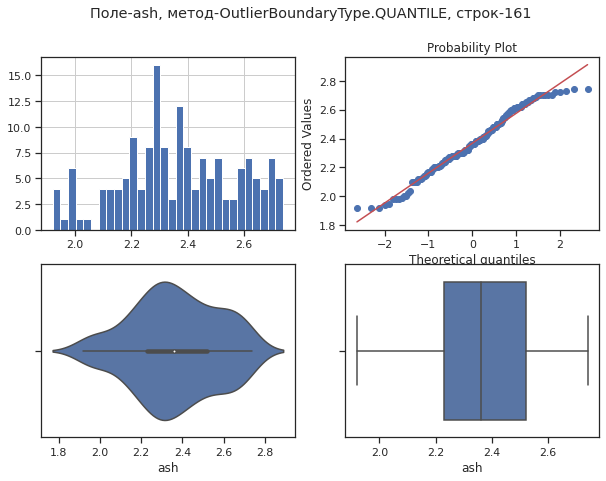

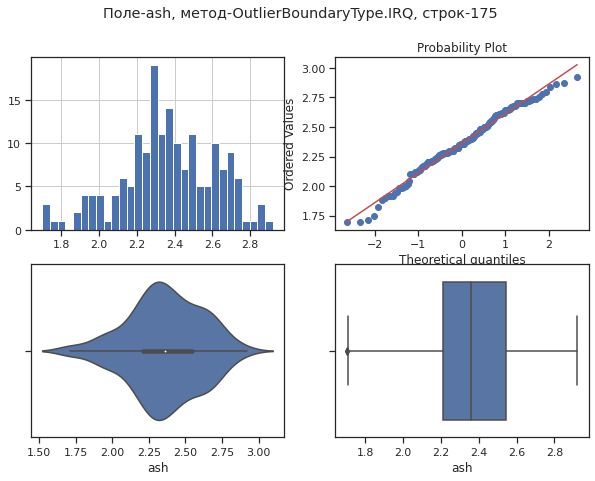

In [34]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

<h3>Замена выбросов

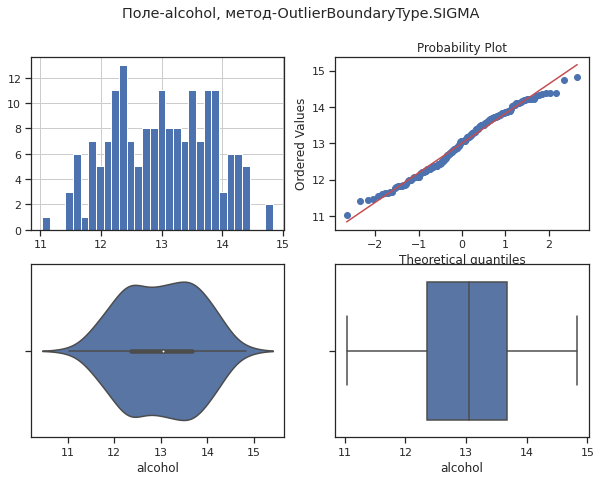

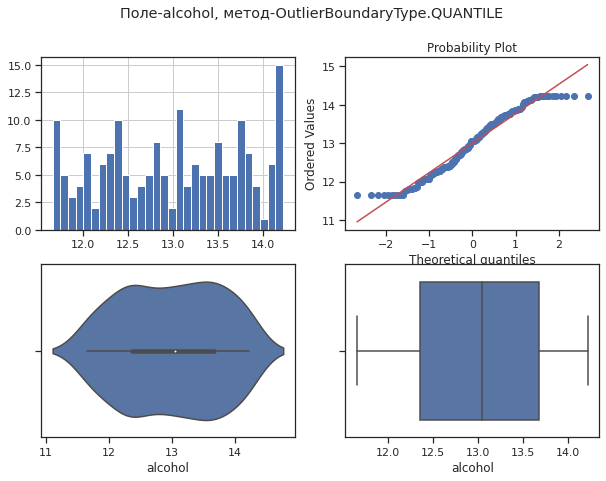

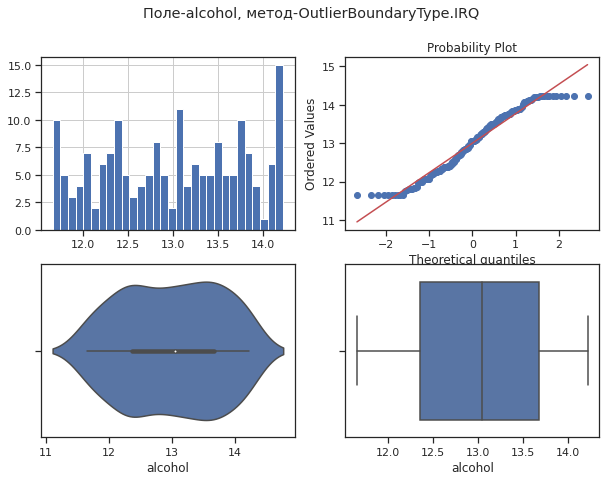

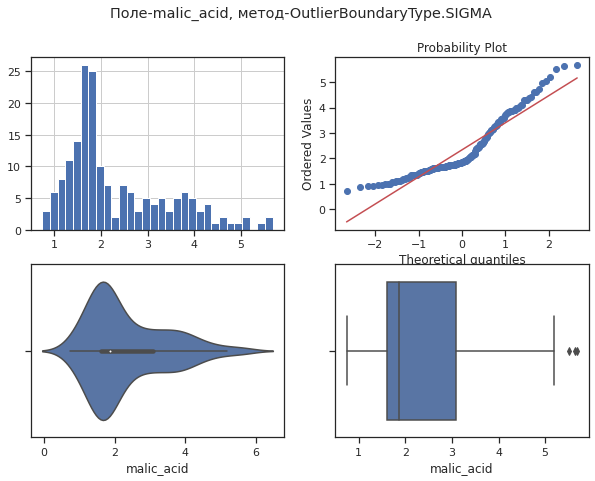

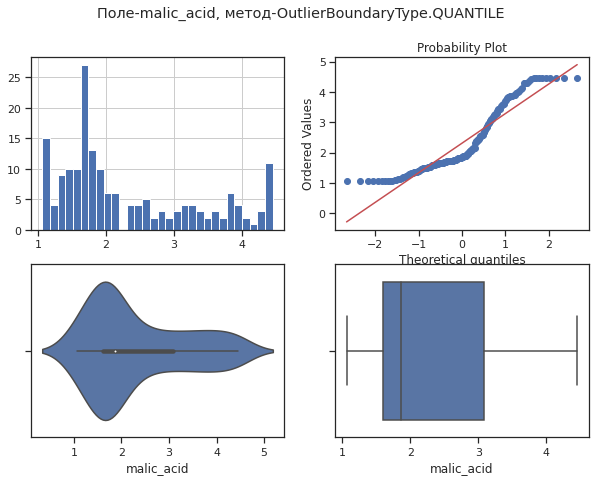

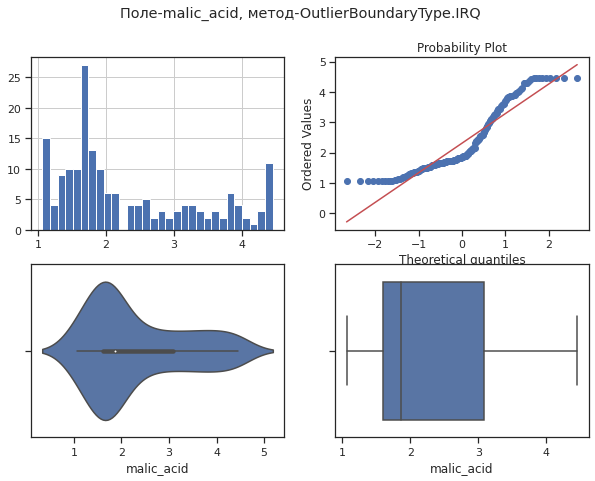

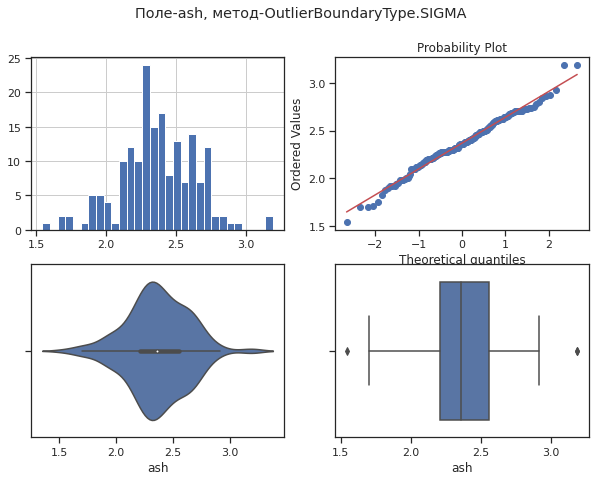

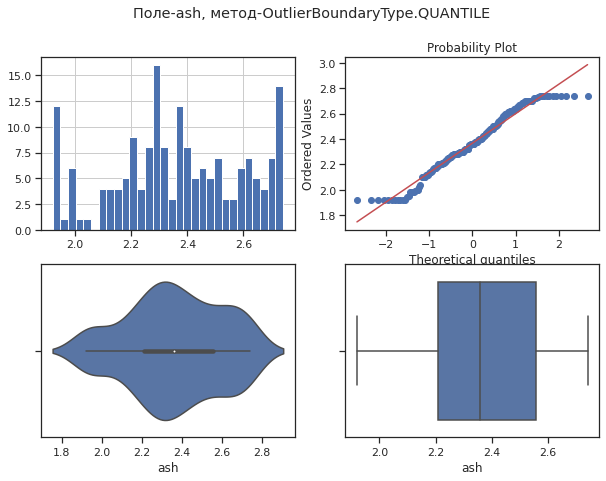

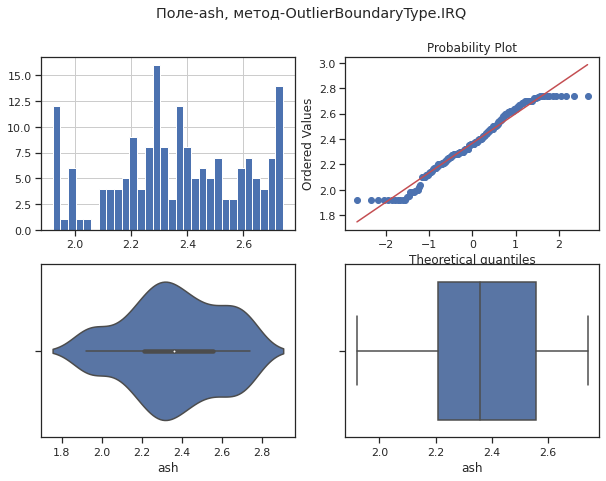

In [35]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

<h2>Обработка нестандартного признака

<h3>Обработка даты и времени

In [37]:
data = pd.read_csv('/content/drive/MyDrive/MMO Salnikov/LR3/T1.csv')

In [ ]:
data.shape

(50530, 5)

In [ ]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [38]:
data.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [39]:
data['dt'] = data.apply(lambda x: pd.to_datetime(x['Date/Time'], format='%d %M %Y %H:%S'), axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),dt
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018-01-01 00:01:00
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018-01-01 00:01:10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018-01-01 00:01:20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018-01-01 00:01:30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018-01-01 00:01:40


In [40]:
data.dtypes

Date/Time                                object
LV ActivePower (kW)                     float64
Wind Speed (m/s)                        float64
Theoretical_Power_Curve (KWh)           float64
Wind Direction (°)                      float64
dt                               datetime64[ns]
dtype: object

<h2>Отбор признаков

In [41]:
wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_feature_names = wine['feature_names']
wine_x_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

<h3>Методы основанные на статистических характеристиках

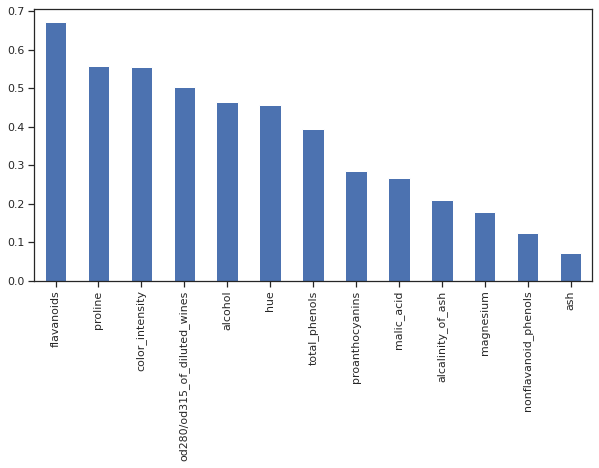

In [42]:
mi = mutual_info_regression(wine_X, wine_y)
mi = pd.Series(mi)
mi.index = wine_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))

In [43]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(wine_X, wine_y)
list(zip(wine_feature_names, sel_mi.get_support()))

[('alcohol', False),
 ('malic_acid', False),
 ('ash', False),
 ('alcalinity_of_ash', False),
 ('magnesium', False),
 ('total_phenols', False),
 ('flavanoids', True),
 ('nonflavanoid_phenols', False),
 ('proanthocyanins', False),
 ('color_intensity', True),
 ('hue', True),
 ('od280/od315_of_diluted_wines', True),
 ('proline', True)]

<h2>Методы вложений

<h3>Использование линейных моделей

In [47]:
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(wine_X, wine_y)
e_lr1.coef_

array([[ 1.41334920e+00,  4.66718035e+00,  1.82985032e+01,
        -2.42939991e+00,  1.26055359e-02,  4.68613806e-01,
         9.33614994e+00,  0.00000000e+00, -5.50614454e+00,
        -1.32071634e+00, -5.83797139e+00,  1.97920879e+00,
         6.39909145e-02],
       [-5.94176493e-01, -2.92845801e+00, -1.33359876e+01,
         1.20169737e+00, -4.92133181e-02,  1.05136658e+00,
         2.19592052e+00,  1.05799119e+01,  3.15989185e+00,
        -5.34592136e+00,  1.86190133e+01, -3.18118476e+00,
        -3.52899721e-02],
       [ 2.89017626e-01,  1.54936167e+00,  1.60601835e+00,
         1.34927121e-01,  4.41698641e-02, -3.57511137e-01,
        -8.39357634e+00, -7.76433231e+00, -3.08962478e+00,
         1.96695507e+00, -7.48810600e+00, -4.46354835e+00,
         4.36201888e-03]])

In [48]:
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(wine_X, wine_y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])